# Bar Charts With Express

## From List Data

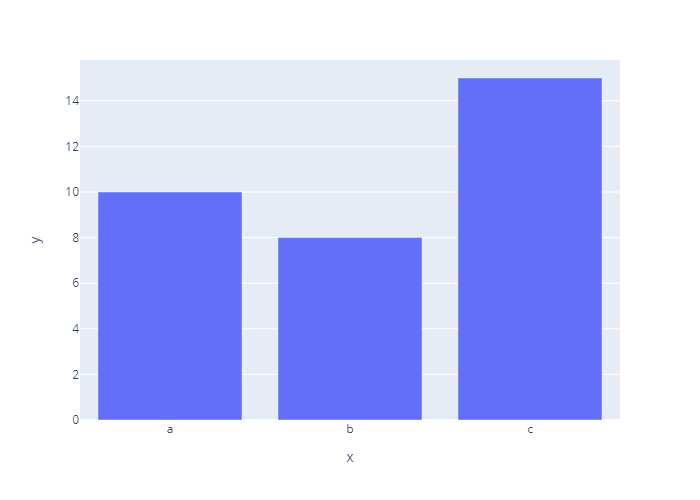

In [2]:
import plotly.express as px
px.bar( x=["a","b","c"], y=[10,8,15])

## From DataFrame

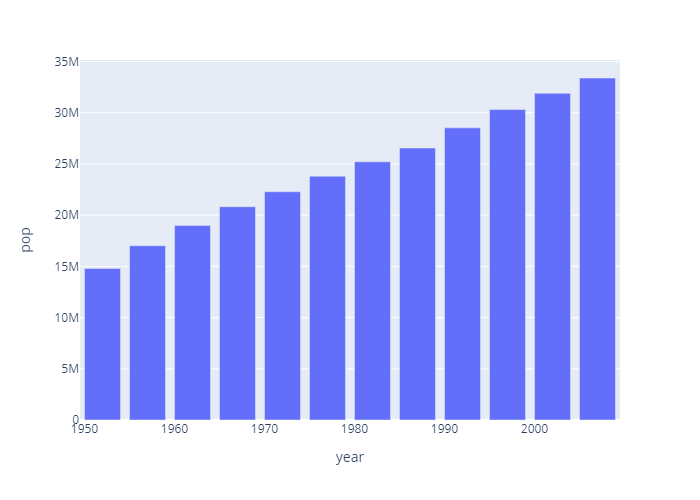

In [3]:
import plotly.express as px
px.bar(px.data.gapminder().query("country == 'Canada'"), x='year', y='pop')

## Continuous Color

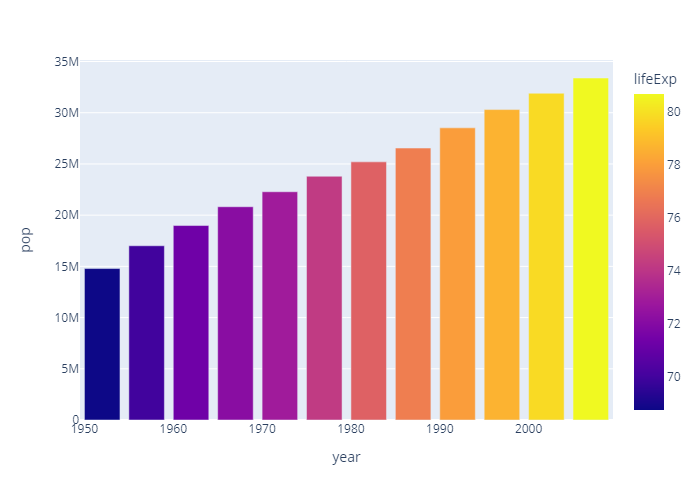

In [4]:
import plotly.express as px
px.bar(px.data.gapminder().query("country == 'Canada'"), x='year', y='pop', color='lifeExp')

## Categorical Color

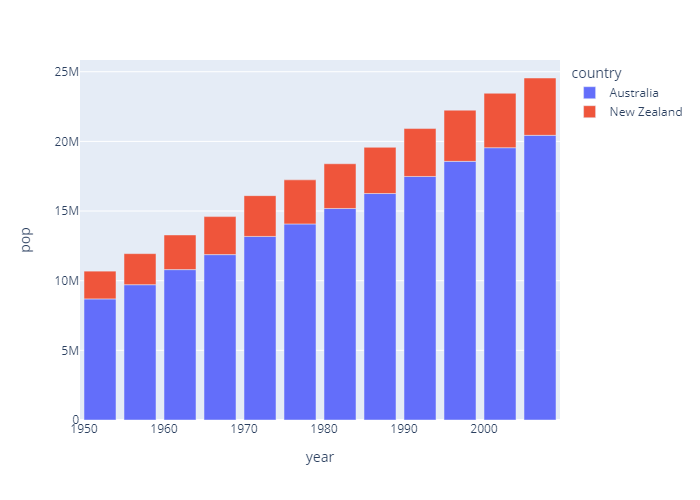

In [5]:
import plotly.express as px
px.bar(px.data.gapminder().query("continent == 'Oceania'"), x='year', y='pop', color='country')

## Fully Stacked

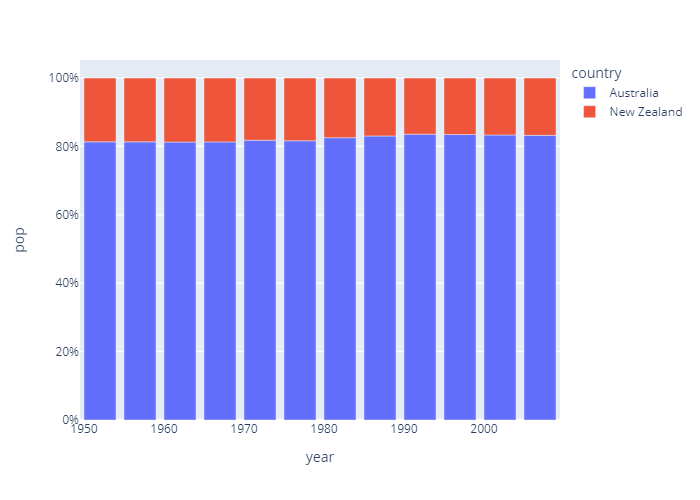

In [6]:
import plotly.express as px

def fully_stacked(df, x, y, color):
    
    return px.bar(df.groupby([x, color]).agg({y:'sum'}).groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index(), 
       x=x, y=y, color=color
    )

fig = fully_stacked(px.data.gapminder().query("continent == 'Oceania'"), x='year', y='pop', color='country')
fig.layout.yaxis.tickformat=',.0%'
fig

## From Long-Form DataFrame

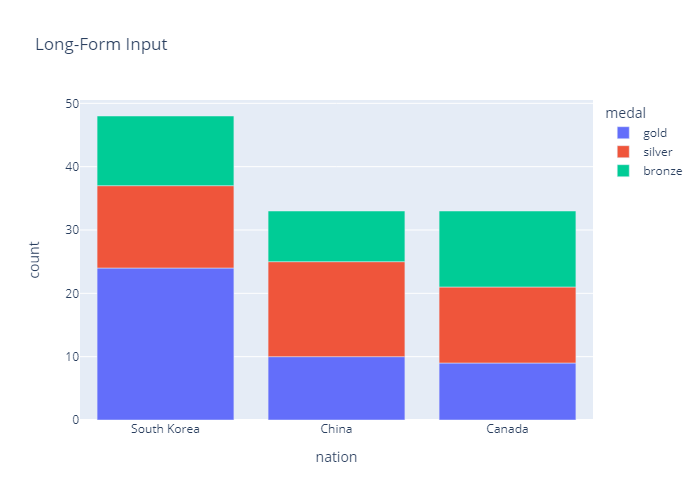

In [7]:
import plotly.express as px
px.bar(px.data.medals_long(), x="nation", y="count", color="medal", title="Long-Form Input")

## From Wide-Form DataFrame

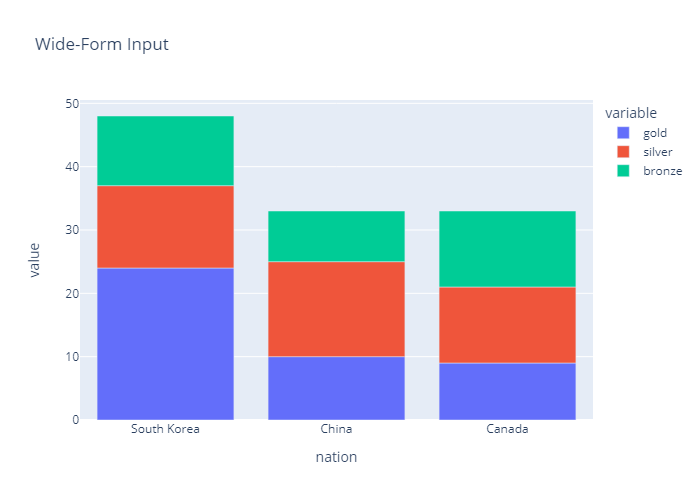

In [8]:
import plotly.express as px
px.bar(px.data.medals_wide(), x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input")

## Multiple Rows

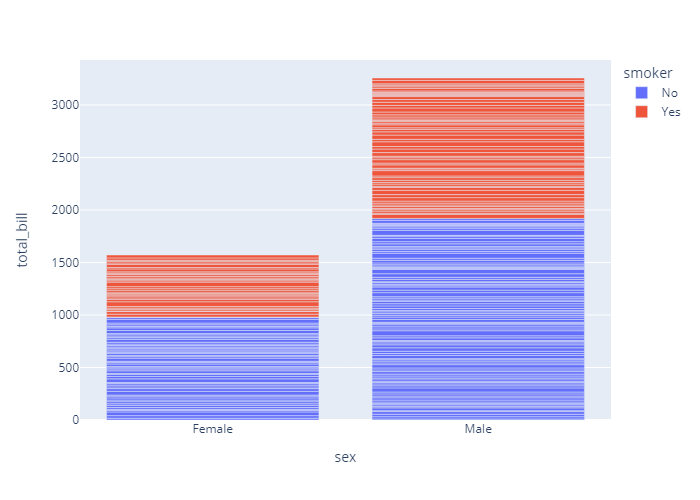

In [9]:
import plotly.express as px
px.bar(px.data.tips(), x="sex", y="total_bill", color="smoker")

## Grouped

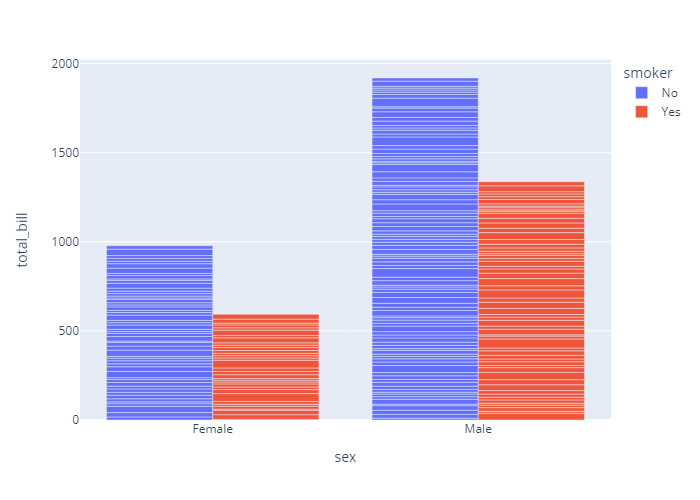

In [10]:
import plotly.express as px
px.bar(px.data.tips(), x="sex", y="total_bill", color="smoker", barmode="group")

# Histogram Instead of Bar

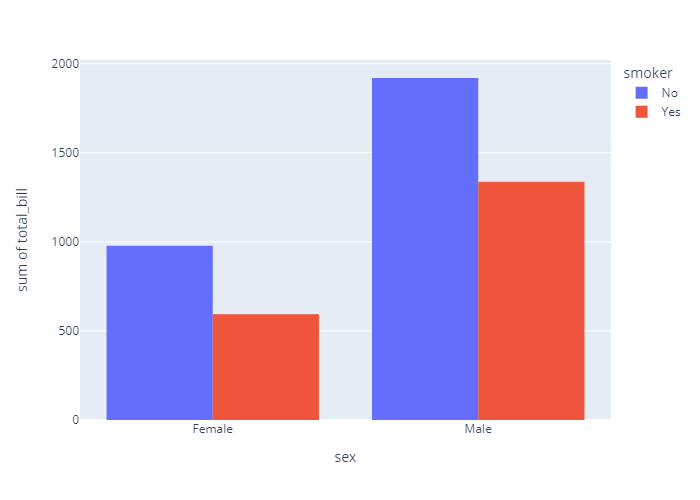

In [11]:
# Use Histogram to combine aggregate across rows and produce single bar per group
import plotly.express as px
px.histogram(px.data.tips(), x="sex", y="total_bill", color="smoker", barmode="group")

## Patterns

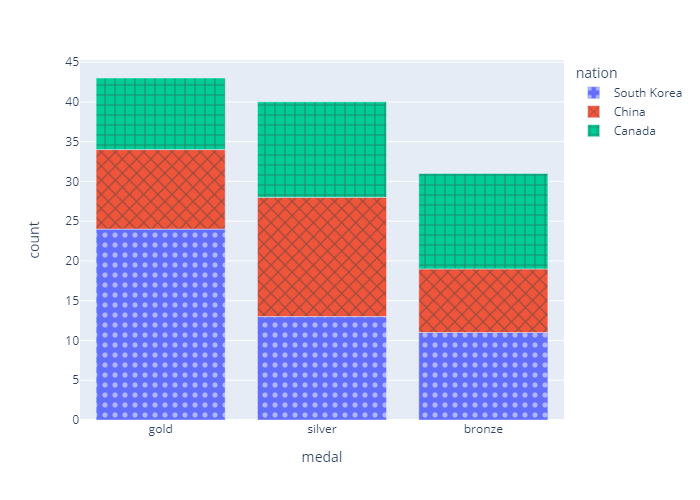

In [12]:
import plotly.express as px

px.bar(px.data.medals_long(), x="medal", y="count", color="nation",
             pattern_shape="nation", pattern_shape_sequence=[".", "x", "+"])

## Show Values

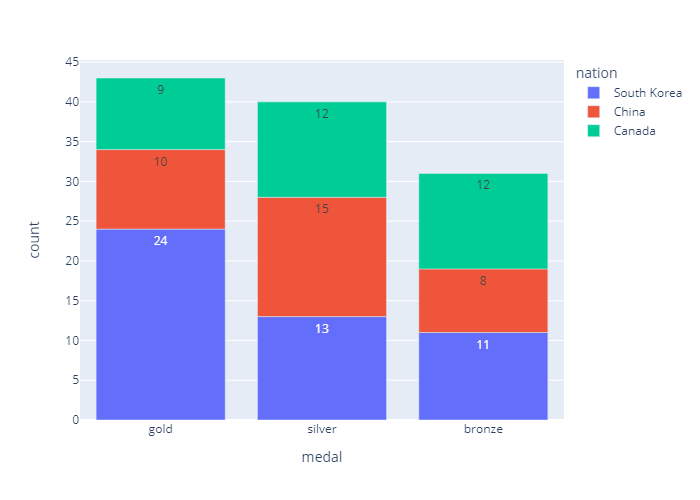

In [13]:
import plotly.express as px
px.bar(px.data.medals_long(), x="medal", y="count", color="nation", text_auto=True)

## Show Groups

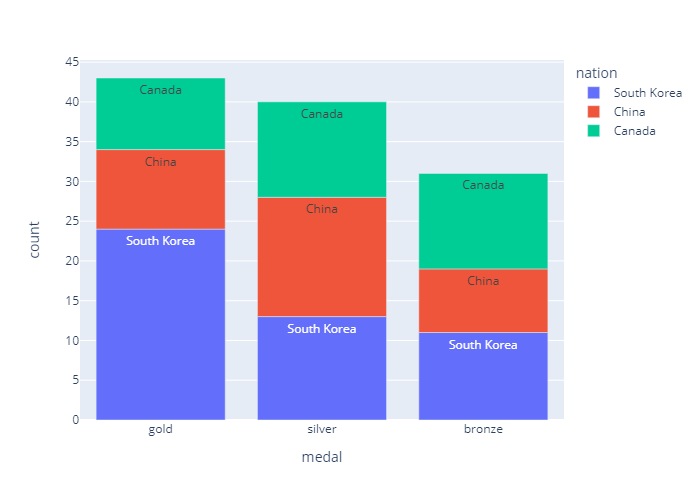

In [14]:
import plotly.express as px
px.bar(px.data.medals_long(), x="medal", y="count", color="nation", text="nation")

## Text Style

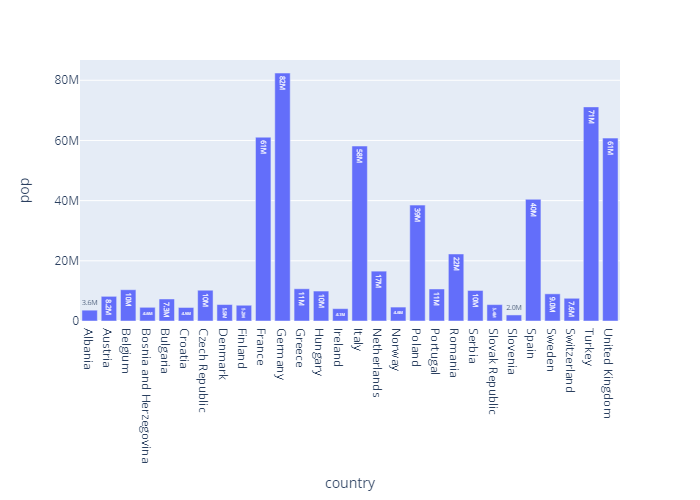

In [15]:
import plotly.express as px

df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
px.bar(df, y='pop', x='country', text_auto='.2s')

## Text Above

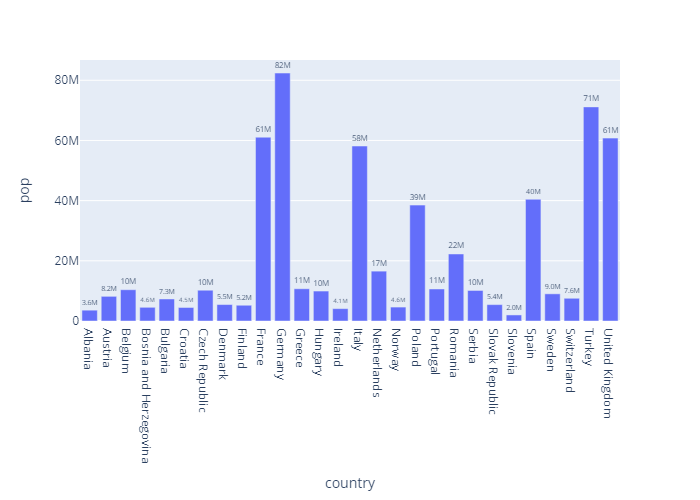

In [16]:
import plotly.express as px

df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig

## Order

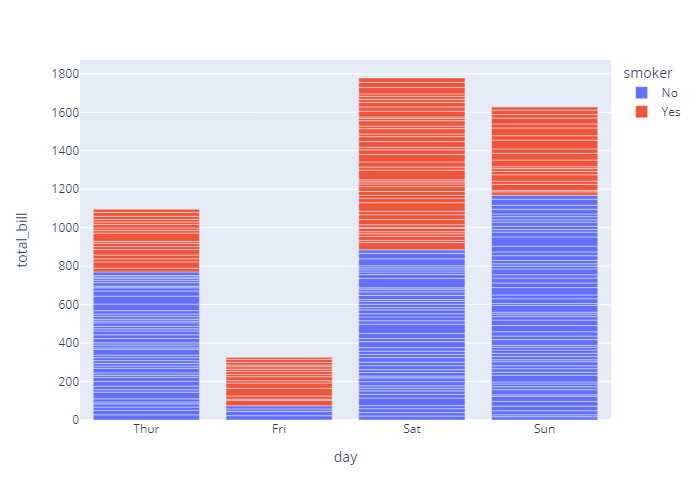

In [17]:
# Set order of bars
import plotly.express as px
px.bar(px.data.tips(), x="day", y="total_bill", color="smoker", category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]})

## Facets

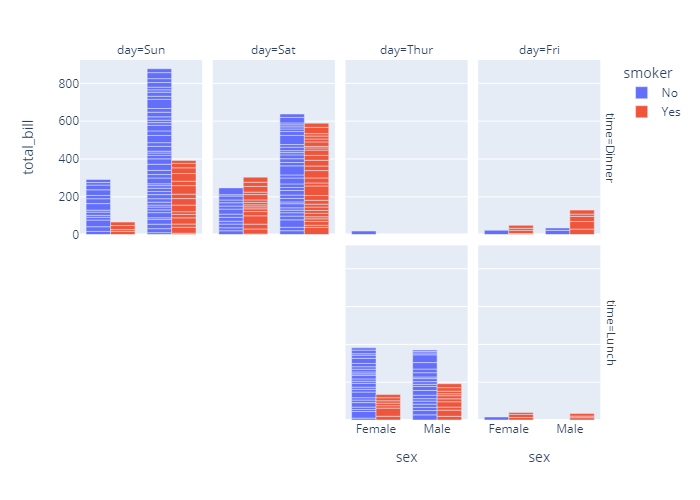

In [18]:
import plotly.express as px
px.bar(px.data.tips(), x="sex", y="total_bill", color="smoker", barmode="group", facet_row="time", facet_col="day")

## Text Position

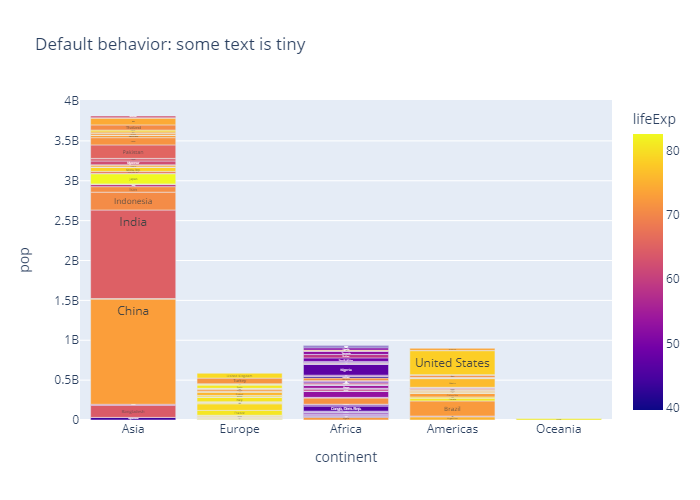

In [19]:
import plotly.express as px

df = px.data.gapminder(year=2007)
fig = px.bar(df, x='continent', y='pop', color="lifeExp", text='country', 
             title="Default behavior: some text is tiny")
fig.update_traces(textposition='inside')
fig.show()

## Uniform Text

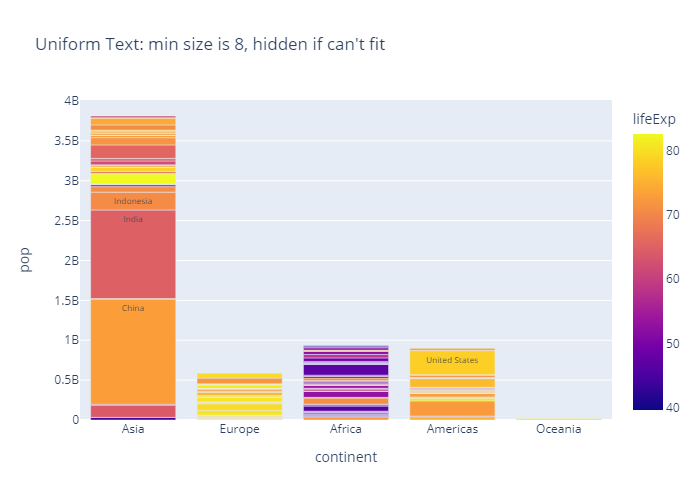

In [20]:
import plotly.express as px

df = px.data.gapminder(year=2007)
fig = px.bar(df, x='continent', y='pop', color="lifeExp", text='country', 
             title="Uniform Text: min size is 8, hidden if can't fit")
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

## Visualizing coefficients for multiple linear regression (MLR)

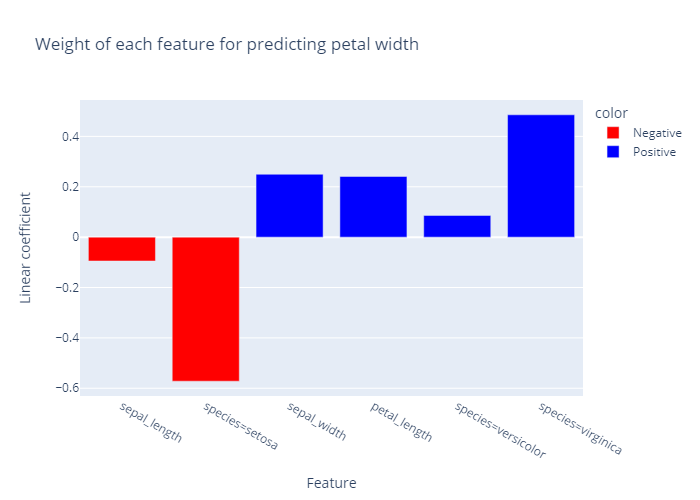

In [21]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

df = px.data.iris()

X = df.drop(columns=['petal_width', 'species_id'])
X = pd.get_dummies(X, columns=['species'], prefix_sep='=')
y = df['petal_width']

model = LinearRegression()
model.fit(X, y)

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting petal width'
)